In [1]:
import pandas as pd
import numpy as np
import PIL.Image as pilimg
import matplotlib.pyplot as plt
import statsmodels.api as sm

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV



## 데이터 설명
#### id : data id

#### digit : hidden num

#### letter : alpabet which hide num

#### 0~783 : 28*28 pixel val

In [34]:
#데이터 불러오기 
train_df = pd.read_csv("train.csv")

In [35]:
#데이터 봐보기
train_df

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


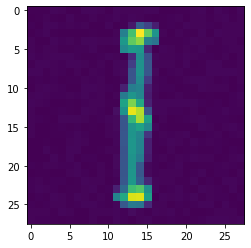

In [36]:
# 이미지 봐보기
## ㅣ 뒤에 숫자 5가 숨어있다.

#ARRAY 화
array_0 =np.array(train_df.loc[0])[3:]
#자료형 변경
array_0= array_0.astype(int)
#28*28 배열 변경
array_0 =array_0.reshape(28,28)
pix = array_0
plt.imshow(pix)

## 분석 시작

In [31]:
#컬럼 정리 id 제거
train_df = train_df.drop("id",axis=1)

In [32]:
#목표 문자 뒤에 있는 숫자를 맞춰보자!
#첫번째 가정


,digit,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,5,L,1,1,1,4,3,0,0,4,...,2,1,0,1,2,4,4,4,3,4
1,0,B,0,4,0,0,4,1,1,1,...,0,3,0,1,4,1,4,2,1,2
2,4,L,1,1,2,2,1,1,1,0,...,3,3,3,0,2,0,3,0,2,2
3,9,D,1,2,0,2,0,4,0,3,...,3,3,2,0,1,4,0,0,1,1
4,6,A,3,0,2,4,0,3,0,4,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,6,V,2,4,3,4,2,4,4,1,...,0,2,2,0,0,1,3,1,4,0
2044,1,L,3,2,2,1,1,4,0,1,...,2,3,4,2,1,2,3,4,1,1
2045,9,A,4,0,4,0,2,4,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,0,Z,2,3,3,0,3,0,4,3,...,2,3,1,1,0,4,1,4,3,1


In [4]:
#ARRAY 화
array_0 =np.array(train_df.loc[0])[3:]
#자료형 변경
array_0= array_0.astype(int)
#28*28 배열 변경
array_0 =array_0.reshape(28,28)
pix = array_0
plt.imshow(pix)

In [7]:
#알파벳 별로 몇개 있는지 체크
train_df.groupby(train_df["letter"]).size()

letter
A    72
B    71
C    74
D    76
E    66
F    80
G    87
H    89
I    64
J    67
K    90
L    89
M    86
N    77
O    90
P    66
Q    82
R    81
S    76
T    82
U    85
V    73
W    69
X    79
Y    86
Z    91
dtype: int64

In [8]:
#숫자 별로 몇개 데이터 있는지 체크
train_df.groupby(train_df["digit"]).size()

digit
0    191
1    202
2    233
3    205
4    207
5    225
6    212
7    194
8    182
9    197
dtype: int64

In [10]:
train_df["digit"] = train_df["digit"].astype(str)
train_df["Y"] = str(train_df["digit"] )+str(train_df["id"])

train_df["Y"] = train_df["letter"] +train_df["digit"]
train_df["Y"].groupby(train_df["Y"]).size()


NameError: name 'trᄐain_df' is not defined

In [11]:
train_df =train_df.drop(["id","digit","letter"],axis=1)

In [12]:
train_df["Y"]

0       L5
1       B0
2       L4
3       D9
4       A6
        ..
2043    V6
2044    L1
2045    A9
2046    Z0
2047    Z5
Name: Y, Length: 2048, dtype: object

In [13]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Y
0,1,1,1,4,3,0,0,4,4,3,...,1,0,1,2,4,4,4,3,4,L5
1,0,4,0,0,4,1,1,1,4,2,...,3,0,1,4,1,4,2,1,2,B0
2,1,1,2,2,1,1,1,0,2,1,...,3,3,0,2,0,3,0,2,2,L4
3,1,2,0,2,0,4,0,3,4,3,...,3,2,0,1,4,0,0,1,1,D9
4,3,0,2,4,0,3,0,4,2,4,...,4,3,2,1,3,4,3,1,2,A6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2,4,3,4,2,4,4,1,2,1,...,2,2,0,0,1,3,1,4,0,V6
2044,3,2,2,1,1,4,0,1,4,2,...,3,4,2,1,2,3,4,1,1,L1
2045,4,0,4,0,2,4,4,4,3,4,...,3,1,1,3,4,2,2,0,0,A9
2046,2,3,3,0,3,0,4,3,0,1,...,3,1,1,0,4,1,4,3,1,Z0


In [14]:
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [15]:
y = train_df["Y"]

In [16]:
X = train_df.drop("Y",axis =1)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2 ,random_state =11)
print(X_train.shape,X_test.shape)

(1638, 784) (410, 784)


In [18]:
train_df1 = pd.read_csv("train.csv")
train_df1

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [19]:
train_df1 = train_df1.drop(["letter","id"],axis =1)

In [20]:
y = train_df1["digit"]

In [21]:
X = train_df1.drop("digit",axis =1)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2 ,random_state =3)
print(X_train.shape,X_test.shape)

(1638, 784) (410, 784)


In [23]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'linear'로 선형분리 진행
 
svm_clf =svm.SVC()

# 교차검증

scores = cross_val_score(svm_clf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X, y, cv =5))

print('교차검증 평균: ', scores.mean())


교차검증 평균:  0.3496105909714354


In [24]:
from sklearn.ensemble import RandomForestClassifier


In [25]:
rfc = RandomForestClassifier(n_estimators=3000)
rfc

RandomForestClassifier(n_estimators=3000)

In [46]:
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=3000)

In [47]:
prediction = rfc.predict(X_test)

In [48]:
print(prediction==y_test)

756      True
581     False
1476     True
400     False
1455     True
        ...  
266      True
702      True
420      True
550     False
490     False
Name: digit, Length: 410, dtype: bool


In [45]:
rfc = RandomForestClassifier(n_estimators=3000)
rfc

RandomForestClassifier(n_estimators=3000)

In [46]:
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=3000)

In [47]:
prediction = rfc.predict(X_test)

In [48]:
print(prediction==y_test)

756      True
581     False
1476     True
400     False
1455     True
        ...  
266      True
702      True
420      True
550     False
490     False
Name: digit, Length: 410, dtype: bool


In [49]:
rfc.score(X_test, y_test)


0.5195121951219512

In [1]:
rf_clf = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 12,
                                min_samples_leaf = 8,
                                min_samples_split = 20,
                                random_state = 0,
                                n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

NameError: name 'RandomForestClassifier' is not defined

In [65]:
train_df2 = pd.read_csv("train.csv")
train_df2 = train_df2.drop("id",axis =1)

In [73]:
train_df2

,digit,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,5,L,1,1,1,4,3,0,0,4,...,2,1,0,1,2,4,4,4,3,4
1,0,B,0,4,0,0,4,1,1,1,...,0,3,0,1,4,1,4,2,1,2
2,4,L,1,1,2,2,1,1,1,0,...,3,3,3,0,2,0,3,0,2,2
3,9,D,1,2,0,2,0,4,0,3,...,3,3,2,0,1,4,0,0,1,1
4,6,A,3,0,2,4,0,3,0,4,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,6,V,2,4,3,4,2,4,4,1,...,0,2,2,0,0,1,3,1,4,0
2044,1,L,3,2,2,1,1,4,0,1,...,2,3,4,2,1,2,3,4,1,1
2045,9,A,4,0,4,0,2,4,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,0,Z,2,3,3,0,3,0,4,3,...,2,3,1,1,0,4,1,4,3,1


In [79]:
alpha =(train_df2["letter"].groupby(train_df2["letter"]).size()).keys()

In [82]:
alpah = list(alpha)

In [89]:
for i in alpha:
    i= pd.DataFrame(train_df2[train_df2["letter"] == i])
    

In [91]:
i


,digit,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
36,1,Z,4,2,1,3,4,2,1,2,...,3,1,2,4,0,4,2,1,3,0
81,4,Z,3,2,2,2,2,4,4,0,...,3,4,0,2,2,0,2,0,0,1
123,0,Z,0,2,0,1,0,2,2,1,...,4,4,3,1,2,0,1,0,1,2
134,6,Z,0,1,2,4,2,3,4,1,...,3,1,2,3,3,4,0,2,0,2
138,3,Z,0,4,3,3,0,4,4,2,...,3,2,3,4,3,2,1,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,4,Z,4,2,4,0,1,2,1,1,...,2,4,1,4,4,2,3,0,0,2
1993,1,Z,3,4,1,2,4,0,4,2,...,0,0,1,4,2,2,1,4,0,4
2021,5,Z,3,3,2,3,0,1,4,3,...,4,1,2,1,4,3,4,0,1,1
2046,0,Z,2,3,3,0,3,0,4,3,...,2,3,1,1,0,4,1,4,3,1


In [97]:
y = i["digit"]

In [98]:
X = i.drop("digit",axis =1)

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2 ,random_state =3)
print(X_train.shape,X_test.shape)

(72, 785) (19, 785)


In [101]:
svm_clf =svm.SVC()

# 교차검증

scores = cross_val_score(svm_clf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X, y, cv =5))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  nan


/Users/codefreak/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/codefreak/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/codefreak/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/codefreak/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 160, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "/Users/codefreak/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check